#### Import the library 

In [8]:
# Import libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### And read data file, save them to 'Data' values

In [9]:
##### Read file .csv
Data = pd.read_csv(r'Top100videogamesales.csv')

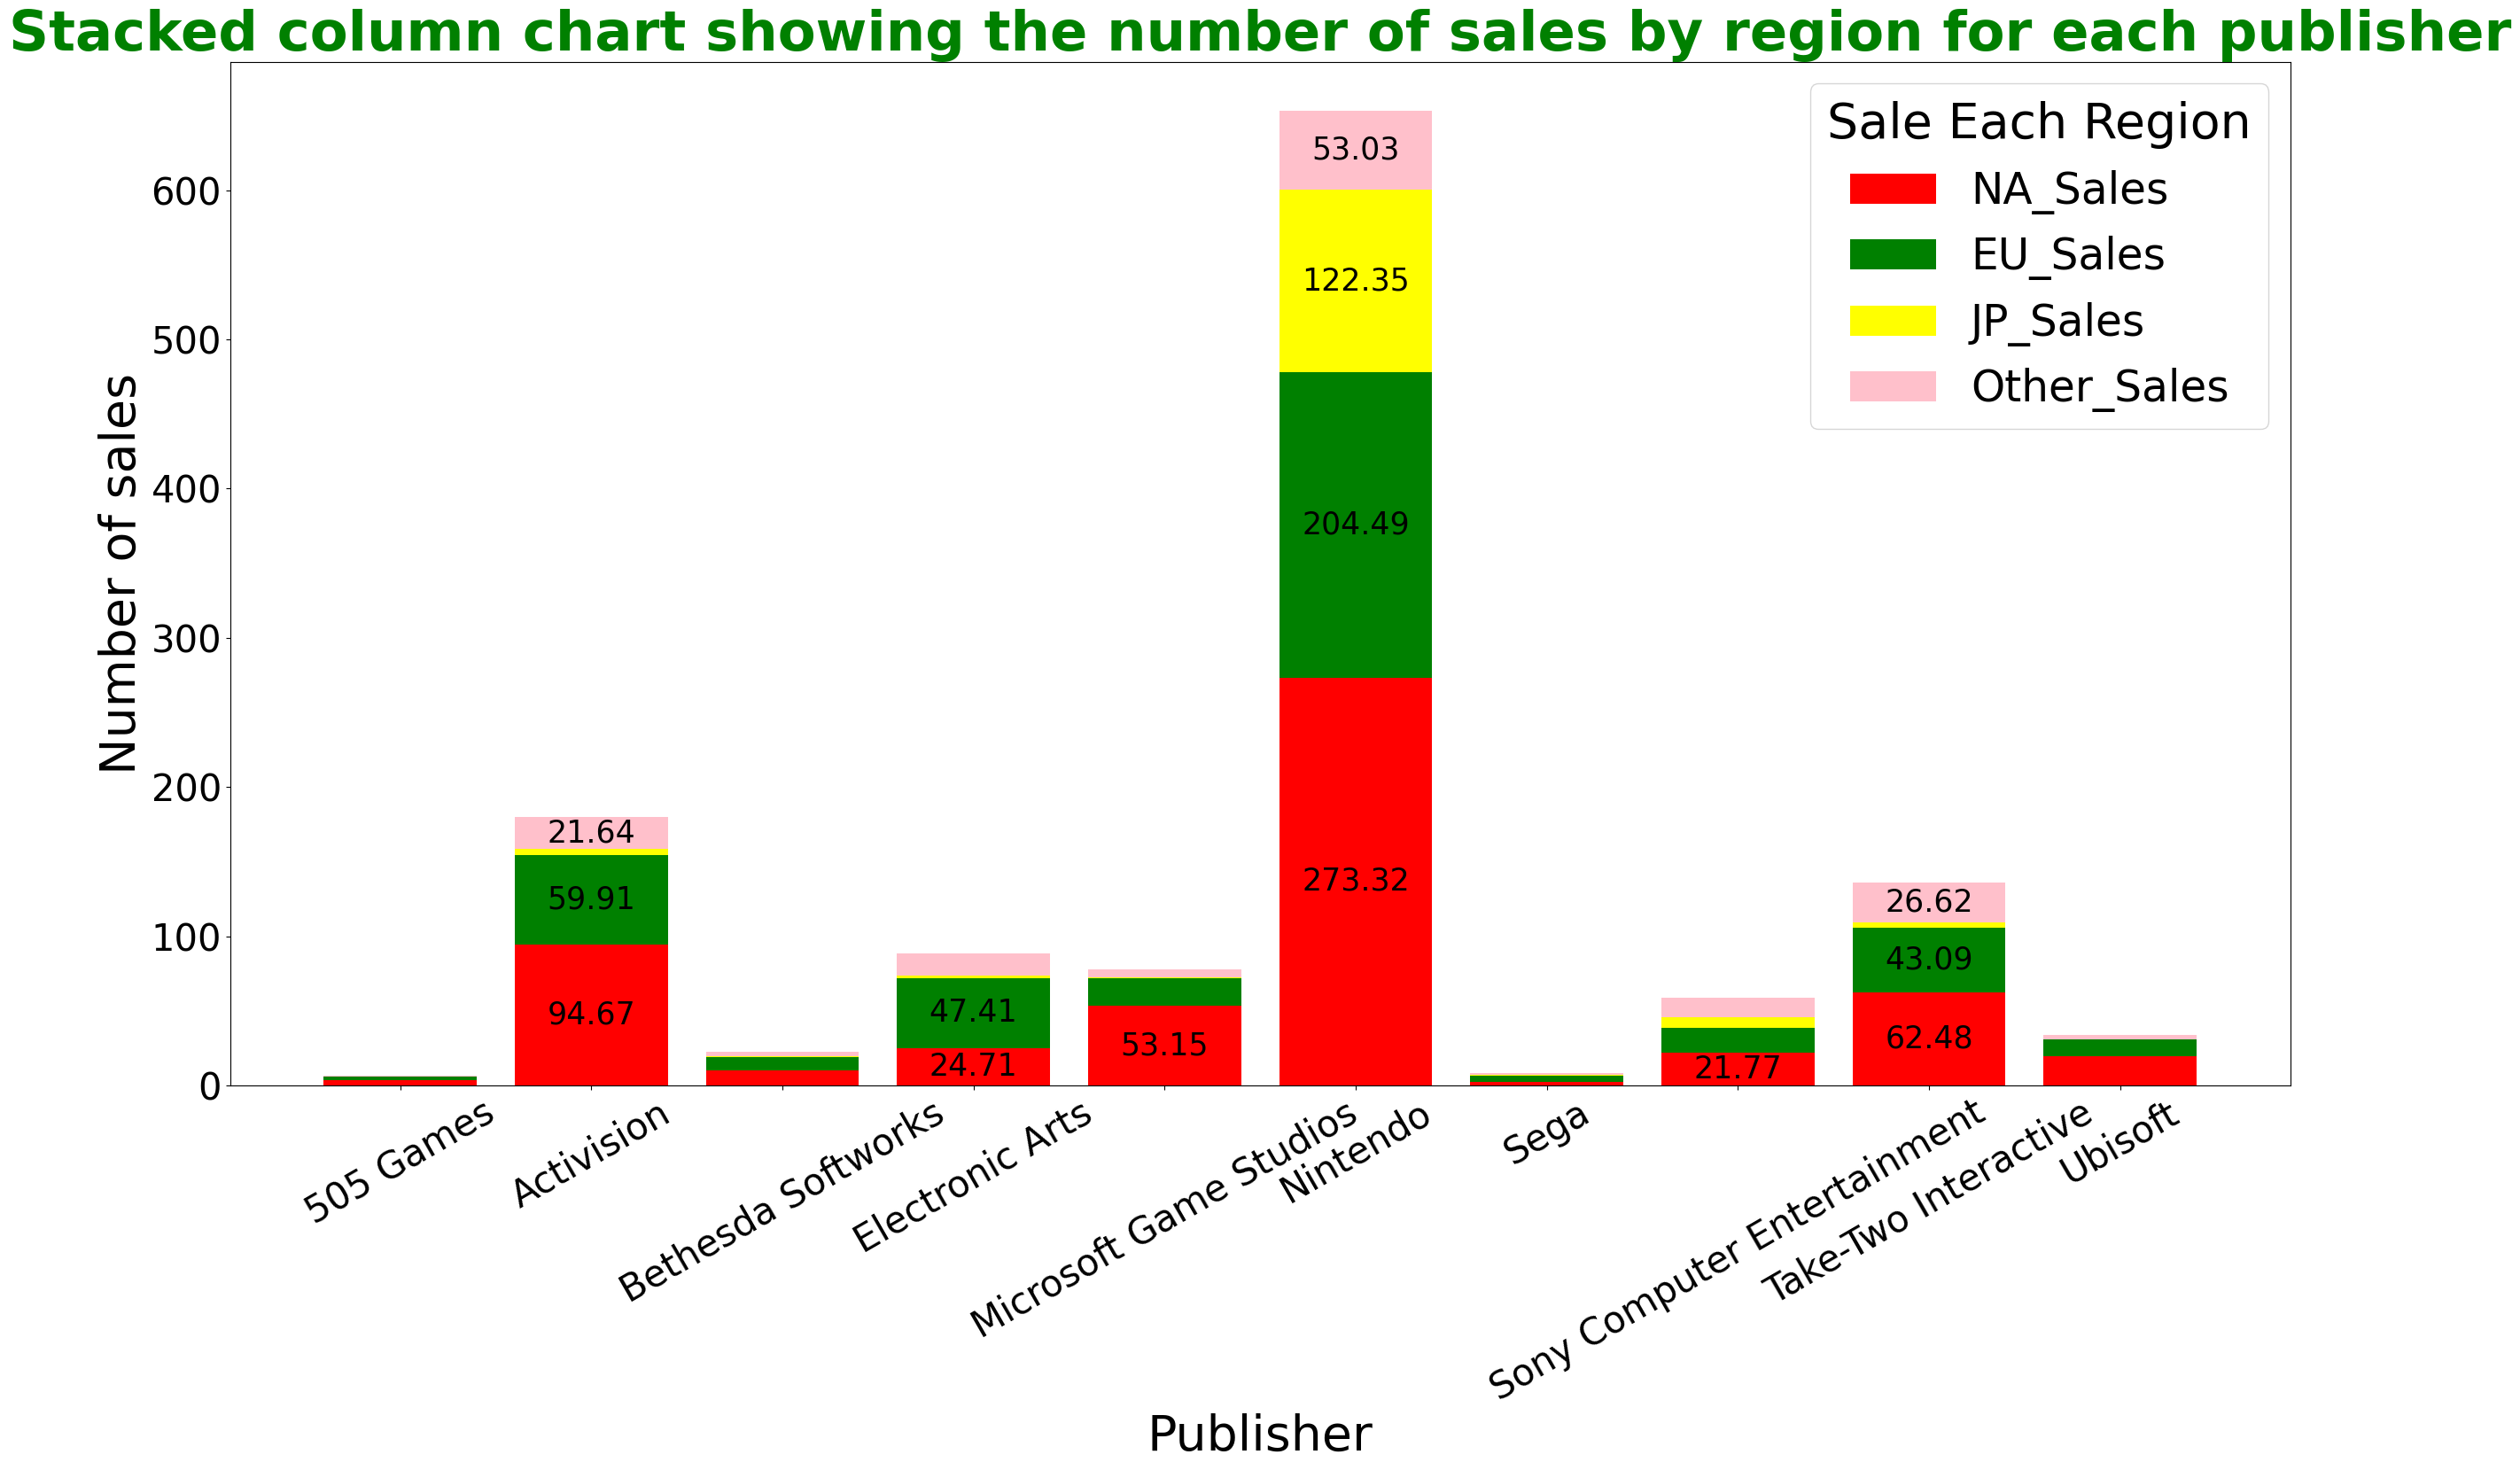

In [35]:
# Create a stacked column (or bar) chart to show the sales by region for each publisher in the data.

# Analysis data
Data_1 = Data.groupby(Data.Publisher).sum()
Data_1 = Data_1[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
Data_1.reset_index(level=0, inplace=True)

# Create a stacked column chart with custom colors
cumval = 0
fig, ax = plt.subplots(figsize=(30, 15))

# Define colors for each region's sales column
colors = {'NA_Sales': 'red', 'EU_Sales': 'green', 'JP_Sales': 'yellow', 'Other_Sales': 'pink'}

for col in Data_1.columns[~Data_1.columns.isin(['Publisher'])]:
    bars = ax.bar(Data_1.Publisher, Data_1[col], bottom=cumval, label=col, color=colors[col])
    cumval = cumval + Data_1[col]

# Add annotations to each bar
    for bar in bars:
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()
        label_text = round(height, 2)
        if label_text >= 20: # If values is to small, we don't need to display this
            label_x = x + width / 2
            label_y = y + height / 2
            ax.text(label_x, label_y, label_text, ha='center',    
                    va='center', fontsize = 25)

# Edit headline
plt.title("Stacked column chart showing the number of sales by region for each publisher", 
fontsize=45, color="green", fontweight='bold')

# Edit X and Y label
plt.xlabel("Publisher", fontsize=40)
plt.ylabel("Number of sales", fontsize=40)

# Rotation and smaller font size for category labels on x-axis and y-axis
plt.xticks(rotation=30, fontsize=30)
plt.yticks(fontsize=30)

# Change size legend
legend = ax.legend(fontsize=35)

# Add legend title
legend.set_title("Sale Each Region", prop={'size': 40})

plt.show()

#### Question number 1
The barchart above show the sales by region for each publisher in the data. You can see the colors representative for each sale by region: blue for NA_Sale, orange for EU_Sale, green for JP_Sale and red for orther sale. The highest total sale by 'Publisher' category is 'Nintendo' which is above 600


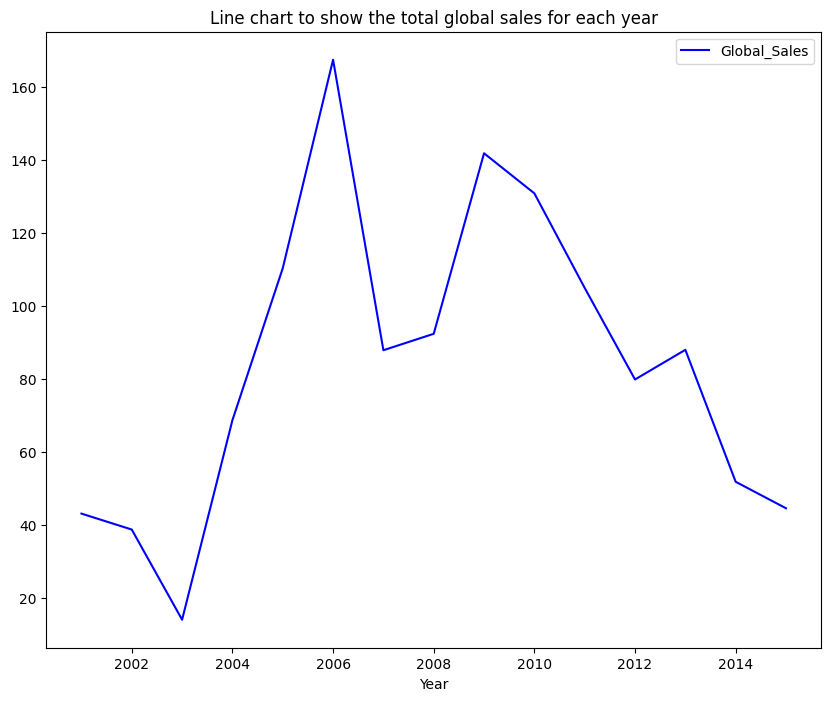

In [37]:
'''2 .Global Sales by Year: 
Create a line chart to show the total global sales for each year. 
Explain the result of the chart in markdown.'''

Data_2 = Data.groupby(Data.Year).sum()
Data_2.reset_index(level=0, inplace=True)
Data_2 = Data_2[['Year','Global_Sales']]
# plotting the dataframe
Data_2.plot(x="Year", y=['Global_Sales' ], kind="line", figsize=(10, 8), color = 'blue')

plt.title("Line chart to show the total global sales for each year")

# displaying line graph
plt.show()

#### Question number 2.
The linechart above show the sale total for each year, you can see the highest total sale above 160 in 2006 and below 20 in 2003

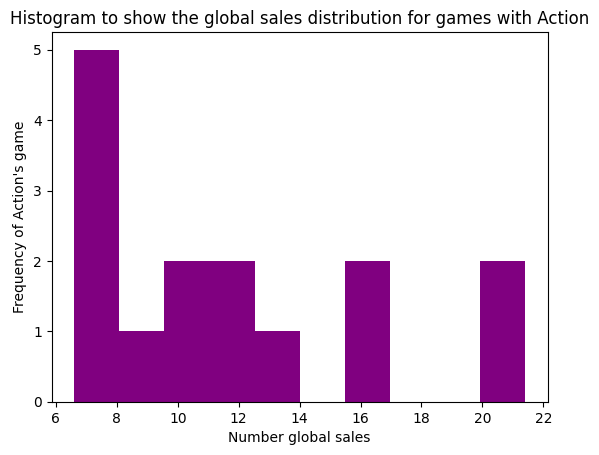

In [12]:
'''3.Global Sales Distribution for Action Games: 
Create a histogram to show the global sales distribution for games with Action as the genre.
Explain the chart with markdown.'''

Data_3 = Data[Data.Genre == 'Action']
bins = np.arange(0,Data_3.shape[0],1)

plt.title("Histogram to show the global sales distribution for games with Action")
plt.xlabel("Number global sales")
plt.ylabel("Frequency of Action's game")

plt.hist(data = Data_3, x = 'Global_Sales', color='purple')
plt.show()

#### Question number 3:
The histogram above show the frequency for total sale in 'Global_Sales'. 
You can see most of the game have number of sale between 6 and 14, 2 games have 16 total sale and 2 games have above 20 total sale

Text(0.5, 1.0, 'Pie chart to show the percentage of sales each genre had in the North American market')

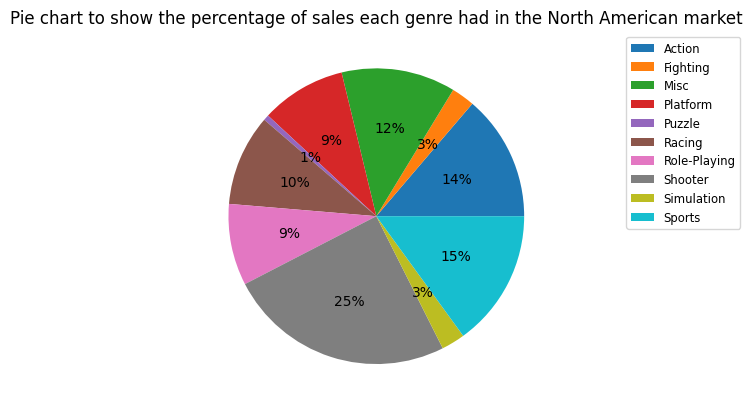

In [49]:
'''4.North American Sales by Genre: 
Create a pie chart to show the percentage of sales each genre had in the North American market. 
(Group smaller “slices” together into an “other” category to create an easier to read chart) 
Detail what is included in the other category. Explain the chart using markdown.'''

# Find the North American market
Data_4 = Data[['Genre', 'NA_Sales']]
Data_4 = Data_4.groupby(Data_4.Genre).sum()
Data_4.plot(kind='pie', y='NA_Sales', autopct='%1.0f%%', ylabel='', labeldistance=None)
plt.legend(bbox_to_anchor=(1.5, 1.0),
    fontsize='small')

plt.title("Pie chart to show the percentage of sales each genre had in the North American market")

#### Question number 4.
The pie chart above show the percentage of sales each genre had in the North American market
. You can see the highest percentage sale is 'Shooter' with 25% and the lowest percentage sale is 'Puzzle' with 1%

Text(0.5, 1.0, 'Pie chart to show the percentage of sales each genre had in the European market')

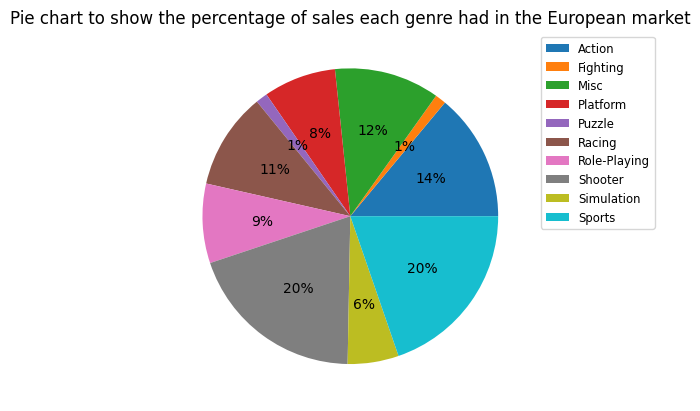

In [50]:
'''5. European Sales by Genre: 
Create a pie chart to show the percentage of sales each genre had in the European market. 
(Group smaller “slices” together into an “other” category to create an easier to read chart)
Detail what is included in the other category. Explain the chart using markdown.'''

# Find the North European market
Data_5 = Data[['Genre', 'EU_Sales']]
Data_5 = Data_5.groupby(Data_5.Genre).sum()
Data_5.plot(kind='pie', y='EU_Sales', autopct='%1.0f%%', title='Genre', ylabel='', labeldistance=None)
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize='small')

plt.title("Pie chart to show the percentage of sales each genre had in the European market")

#### Question number 5.
The pie chart above show the percentage of sales each genre had in the European market. 
You can see the highest percentage sale is both 'Shooter' and 'Sports' with 20%
and the lowest percentage sale is both 'Fighting' and 'Puzzle' with 1%

In [ ]:
#### 6.
'''Explain differences and similarities between the North American and European charts in markdown.'''

#### Question 6: Explain differences and similarities between the North American and European charts in markdown.
The similarities between the North American and European is the highest precentage of sales is 'Shooter' gener which 
respectively is 25% and 20%
and the lowest precentage of sales is 'Puzzle' gener which is 1%. 'Action', 'Misc' and 'Role_playing' gener is 
same values precentage which respectively is 14%, 12% and 9%.

The differences between North American and European is in the European market, 'Sport' gener also the highest 
precentage of sales with 20% and the lowest precentage of sales also 'Fighting' gener with 1%, in North American, 'Sport' gener
get 15%, 'Simulation' gener get 3% in North American market and 6% in European market, 'Rancing' and 'Platform' gener in 
North American market get respectively with 10% and 9% but in European matket get respectively with 11% and 8%.

Text(0, 0.5, 'Number of Games')

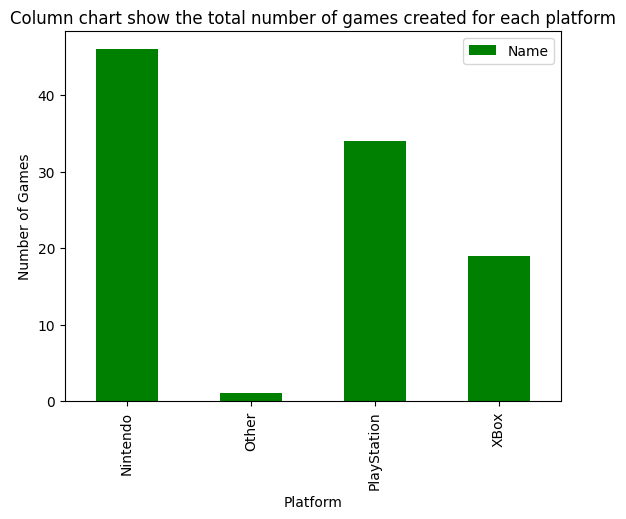

In [15]:
#### 7.
'''Count of Games by Platform: 
Create a bar (or column) chart to show the total number of games created for each platform in the dataset.
Explain the results in markdown.'''

Data_7 = Data.groupby(Data.Platform).count()
Data_7 = Data_7[['Name']]

ax = Data_7.plot(kind='bar', color=['g'])
x_offset = -0.03
y_offset = 0.02
plt.title("Column chart show the total number of games created for each platform")
plt.xlabel("Platform")
plt.ylabel("Number of Games")


#### Question number 7
The column chart above show the total number of games created for each platform. 
You can see the platform have the highest number of games is 'Nintendo' platform with above 40 games, the second place is 
'PlayStation' platform with above 30 games, the third place is 'XBox' with about 20 games and the last palce for 'Orther' platform

### Extra 1.

#### Determine the appropriate charts to answer the following questions 
- What genre of game is present the most in the top 100 games from 2000-2015?
- What percentage of global sales does PlayStation have in the dataset?
- What is the distribution of sales for Shooter games?

### Extra 1.

#### Determine the appropriate charts to answer the following questions 
- What genre of game is present the most in the top 100 games from 2000-2015?

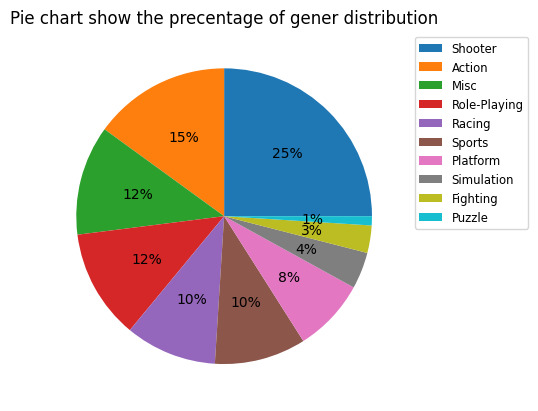

In [89]:
#Extra 1.1: What genre of game is present the most in the top 100 games from 2000-2015

Data_10 = Data.groupby(Data.Genre).count().sort_values(by = 'Name', ascending=False)
Data_10 = Data_10[['Name']]

Data_10.plot(kind='pie', y='Name', autopct='%1.0f%%', title='Pie chart show the precentage of gener distribution', 
             ylabel='', labeldistance=None)
plt.legend(bbox_to_anchor=(1.0, 1.0),
    fontsize='small')

#### Extra 1.1
The pie chart above show the numberic precentage of gener's games.
You can see the highest precentage is 'Shooter' gener with 25%

### Extra 1.

#### Determine the appropriate charts to answer the following questions 
- What percentage of global sales does PlayStation have in the dataset?

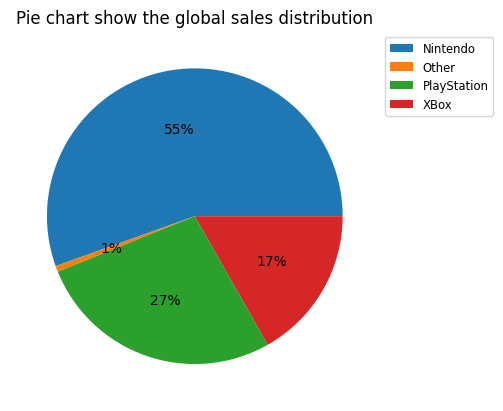

In [90]:
# Extra 1.2: What percentage of global sales does PlayStation have in the dataset

Data_11 = Data.groupby(Data.Platform).sum()
Data_11 = Data_11[['Global_Sales']]

Data_11.plot(kind='pie', y='Global_Sales', autopct='%1.0f%%', title='Pie chart show the global sales distribution', 
             ylabel='', labeldistance=None)
plt.legend(bbox_to_anchor=(1.0, 1.0),
    fontsize='small')

#### Extra 1.2
The pie chart in extra 1.2 show the precentage of platform's distribution.
You can see the 'PlaySation' platform have 27% of games in dataset

### Extra 1.

#### Determine the appropriate charts to answer the following questions 
- What is the distribution of sales for Shooter games?

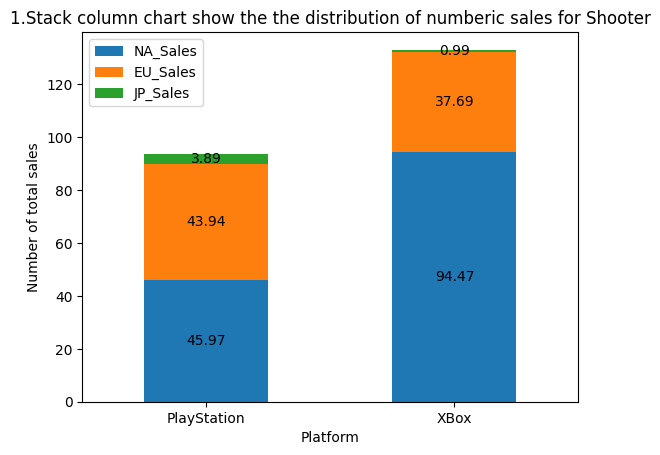

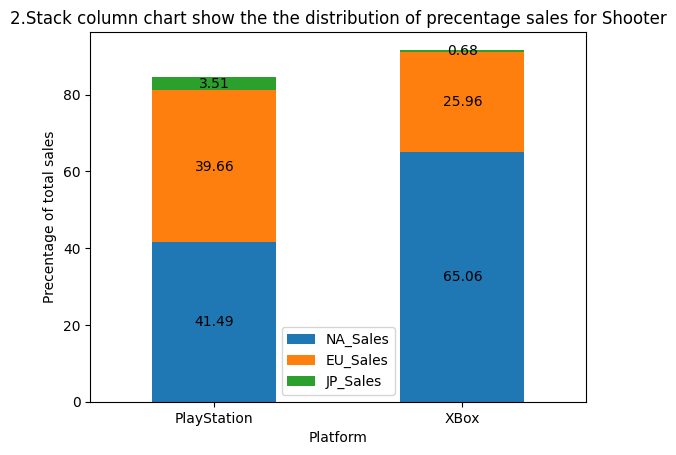

In [27]:
# Extra 1.3: What is the distribution of sales for Shooter games

Data_13 = Data[Data.Genre == 'Shooter']
Data_13 = Data.groupby(Data_13.Platform).sum()
Data_13 = Data_13[['NA_Sales','EU_Sales','JP_Sales','Global_Sales']]
Data_13 = Data_13.reset_index()

Class = Data_13.Platform

# Plot stacked bar chart

ax = Data_13[['NA_Sales','EU_Sales','JP_Sales']].plot(stacked=True, kind='bar')

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = round(height, 2)
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    
# Set Tick labels

ax.set_xticklabels(Class,rotation='horizontal')

# Display chart
plt.title("1.Stack column chart show the the distribution of numberic sales for Shooter")
plt.xlabel("Platform")
plt.ylabel("Number of total sales")
plt.show()

###########################################################
Columns = ['NA_Sales','EU_Sales','JP_Sales']
Data_13_precentage = (Data_13[Columns].divide(Data_13['Global_Sales'], axis=0)*100).round(2)

Class = Data_13.Platform

# Plot stacked bar chart

ax = Data_13_precentage[['NA_Sales','EU_Sales','JP_Sales']].plot(stacked=True, kind='bar')

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = round(height, 2)
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    
# Set Tick labels

ax.set_xticklabels(Class,rotation='horizontal')

# Display chart
plt.title("2.Stack column chart show the the distribution of precentage sales for Shooter")
plt.xlabel("Platform")
plt.ylabel("Precentage of total sales")
plt.show()

#### Extra 1.3
I cerate 2 stack columns chart above show the distribution both numberic and precentage of 'Shooter' gener.
You can see 2 main 'Platform' is 'PlayStation' and 'XBox' and each region's sales. Blue for NA_Sales, orange for EU_Sales and green gor JP_Sales.

The most sales is NA_Sales, the second is EU_Sales and the third is JP Sales